# Лабораторная работа №2.

### Вариант 4.

Фильтрация медианным фильтром с ядром в виде холма (приоритет центра и соседей), в виде впадины (приоритет углов и соседей, в центре 1)

In [1]:
import numpy as np
from PIL import Image

In [2]:
#медианный фильтр с ядром в виде холма (приоритет центра и соседей)
def median_filter_hill(img):
    temp = []
    
    old = np.asarray(img)   
    rows, cols = old.shape
    new = np.zeros( (rows, cols) )
    
    for i in range(rows):
        for j in range(cols):
            for z in range(3):
                for k in range(3):
                    if i - 1 + z < 0 or i - 1 + z >= rows or j - 1 + k < 0 or j - 1 + k >= cols:
                        if ((z + k) % 2 != 0):
                            temp.append(0)
                            temp.append(0)
                        else:
                            temp.append(0)
                    else:
                        if ((z + k) % 2 != 0) or (z == 1 and k == 1):
                            temp.append(old[i - 1 + z][j - 1 + k])
                            temp.append(old[i - 1 + z][j - 1 + k])
                        else:
                            temp.append(old[i - 1 + z][j - 1 + k])
            temp.sort()
            median = (temp[len(temp) // 2] - temp[len(temp) // 2 - 1]) // 2 + temp[len(temp) // 2 - 1]
            new[i][j] = median
            temp = []
    
    new = new.astype(np.uint8)
 
    img_res1 = Image.fromarray(new)
    
    return img_res1

In [3]:
#медианный фильтр с ядром в виде впадины (приоритет углов и соседей)
def median_filter_depression(img):
    temp = []
    
    old = np.asarray(img)   
    rows, cols = old.shape
    new = np.zeros( (rows, cols) )
    
    for i in range(rows):
        for j in range(cols):
            for z in range(3):
                for k in range(3):
                    if i - 1 + z < 0 or i - 1 + z >= rows or j - 1 + k < 0 or j - 1 + k >= cols:
                            temp.append(0)
                            temp.append(0)
                    else:
                        if (z == 1 and k == 1):
                            temp.append(old[i - 1 + z][j - 1 + k])
                        else:
                            temp.append(old[i - 1 + z][j - 1 + k])
                            temp.append(old[i - 1 + z][j - 1 + k])
            temp.sort()
            median = temp[len(temp) // 2]
            new[i][j] = median
            temp = []
    
    new = new.astype(np.uint8)
 
    img_res1 = Image.fromarray(new)
    
    return img_res1

In [4]:
#разностное изображение
def difference(img1,img2):
    old1 = np.asarray(img1)
    old2 = np.asarray(img2)
    rows, cols = old1.shape
    new = np.zeros( (rows, cols) )
    
    for i in range(rows):
        for j in range(cols):
            if old2[i][j] >= old1[i][j]:
                new[i][j] = old2[i][j] - old1[i][j]
            else:
                new[i][j] = old1[i][j] - old2[i][j]
            
    new = new.astype(np.uint8)
 
    dif_res = Image.fromarray(new)
    
    return dif_res

In [6]:
img1 = Image.open("lab2_img1.bmp")
img1_res1 = median_filter_hill(img1)
img1_res2 = median_filter_depression(img1)

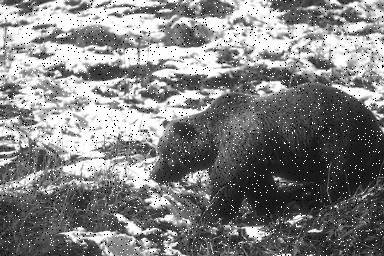

In [6]:
img1

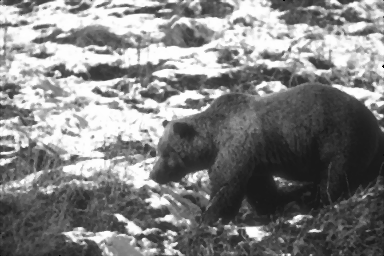

In [7]:
img1_res1

In [7]:
res = difference(img1, img1_res1)
res.save('A.bmp')

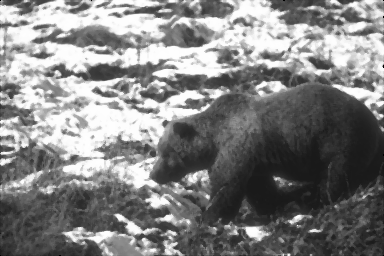

In [9]:
img1_res2

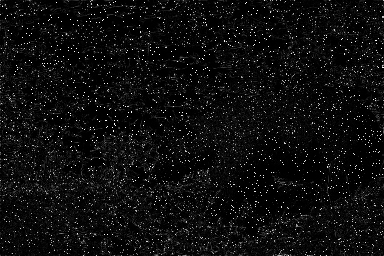

In [10]:
difference(img1, img1_res2)

In [8]:
img2 = Image.open("lab2_img2.bmp")
img2_res1 = median_filter_hill(img2)
img2_res2 = median_filter_depression(img2)

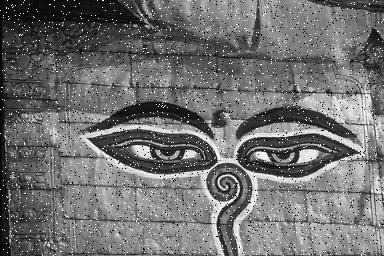

In [9]:
img2

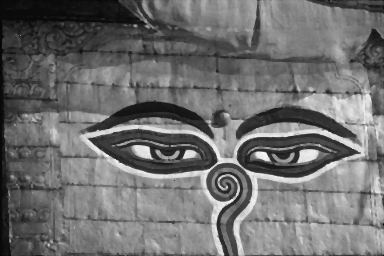

In [10]:
img2_res1

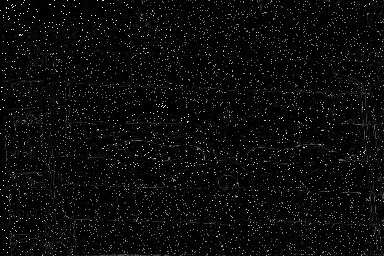

In [12]:
difference(img2, img2_res1)

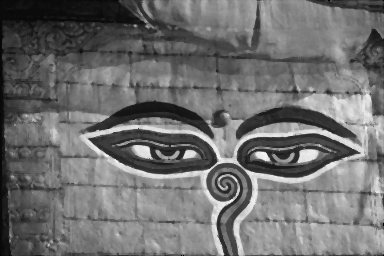

In [15]:
img2_res2

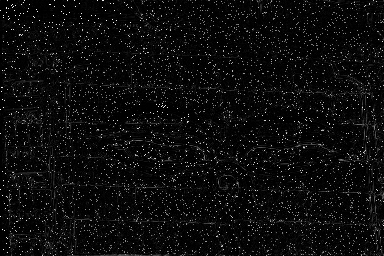

In [16]:
difference(img2, img2_res2)

In [17]:
a = difference(img2, img2_res1)
b = difference(img2, img2_res2)

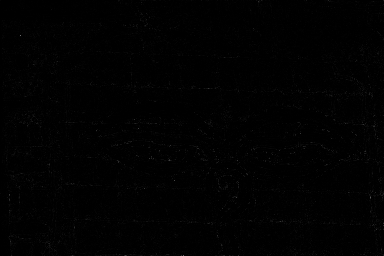

In [18]:
difference(a,b)